In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
# Read the data from csv file
df=pd.read_csv(r'CS-1.csv')
# Look at the data
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [14]:
# Drop the columns that contain unique value as that does not provide significant information for analysis
df=df.drop(columns=['Row ID','Order ID','Customer ID'],axis=1)
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [15]:
# Shape of the dataset
df.shape

(9800, 15)

In [16]:
# Checking data type for each column
df.dtypes

Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [17]:
# Null values in each column
df.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

* Postal Code column contain 11 null values

In [18]:
# Impute the null vlaue with the median value of the column
df['Postal Code']=df['Postal Code'].fillna(df['Postal Code'].median())

In [19]:
# Now there should not be null values in our dataset
df.isnull().sum().sum()

0

# EDA

In [20]:
# Changing the datatype of order_date and ship_date to datetime
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [21]:
# Extracting Year from order_date
df['Order_Year']=df['Order Date'].dt.year
# Extracting month from order_date
df['Order_Month']=df['Order Date'].dt.month
# Extracting day from order_date
df['Order_Day']=df['Order Date'].dt.day
# Extracting Year from ship_date
df['Ship_Year']=df['Ship Date'].dt.year
# Extracting month from ship_date
df['Ship_Month']=df['Ship Date'].dt.month
# Extracting day from ship_date
df['Ship_Day']=df['Ship Date'].dt.day

In [22]:
# Extracting a column that represents the time taken in days to ship after product is ordered
df['Days_between_order_and_ship']=(df['Ship Date']-df['Order Date']).dt.days

In [23]:
# Drop the column after extracting information
df=df.drop(columns=['Order Date','Ship Date'],axis=1)

In [24]:
# Data after all modifications
df.head(3)

,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,Days_between_order_and_ship
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11,8,2017,11,11,3
1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11,8,2017,11,11,3
2,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,6,12,2017,6,16,4


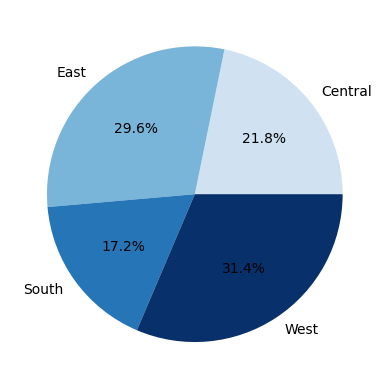

In [33]:
# Sales Analysis by Region
sales_via_region=df.groupby(by=['Region'])['Sales'].sum()
cmap = plt.get_cmap('Blues')
colors = cmap(np.linspace(0.2, 1.0, len(sales_via_region)))
plt.pie(sales_via_region.values,labels=sales_via_region.index,autopct='%1.1f%%',colors=colors)
plt.show()

In [34]:
# Different States where order is delivered
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

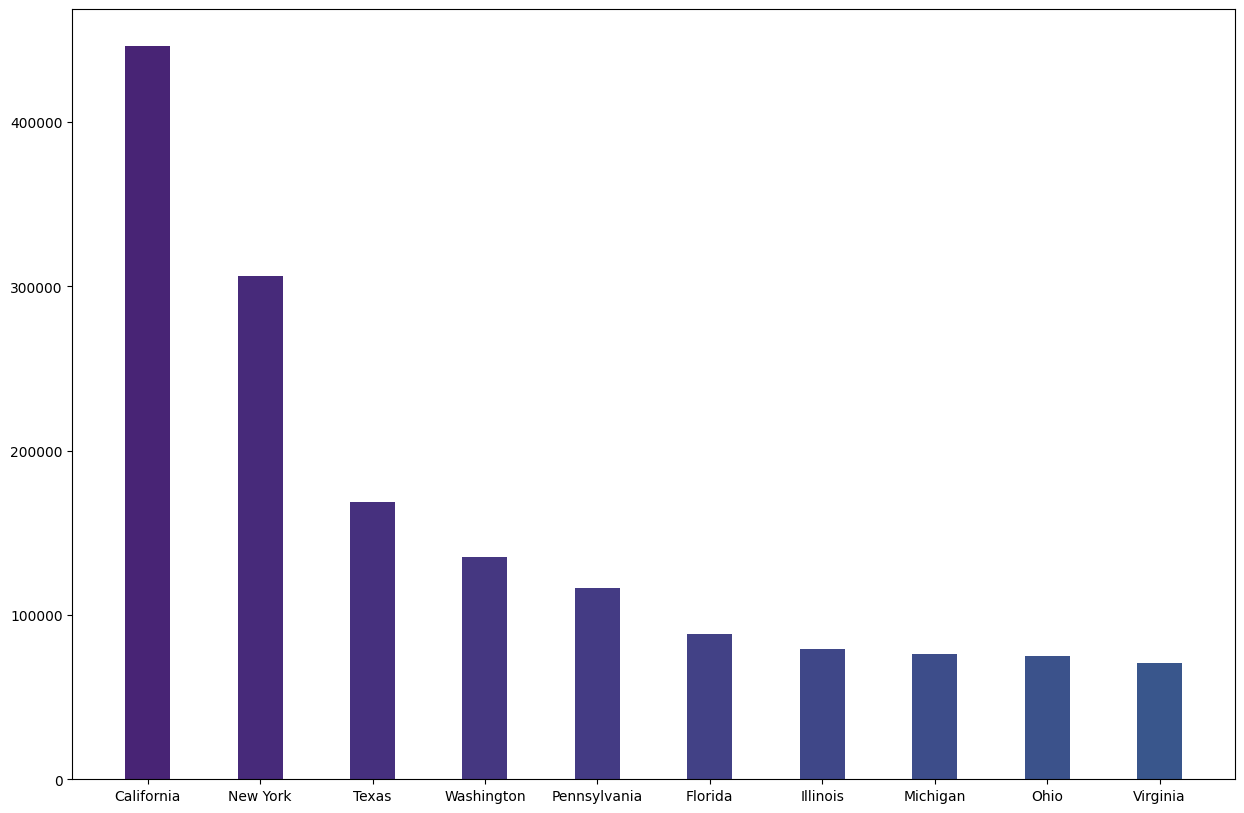

In [51]:
# Top 10 states from where maximum Sales is generated
plt.figure(figsize=(15,10))
cmap=plt.get_cmap('viridis')
sales_via_state=df.groupby(by=['State'])['Sales'].sum().sort_values(ascending=False)
colors=cmap(np.linspace(0.1,1.0,len(sales_via_state)))
plt.bar(x=sales_via_state.index[:10],height=sales_via_state.values[:10],width=0.4,color=colors)
plt.show()

In [55]:
# Number of Different Cities
print('Total Number of Unique Cities-->',len(df['City'].unique()))

Total Number of Unique Cities--> 529


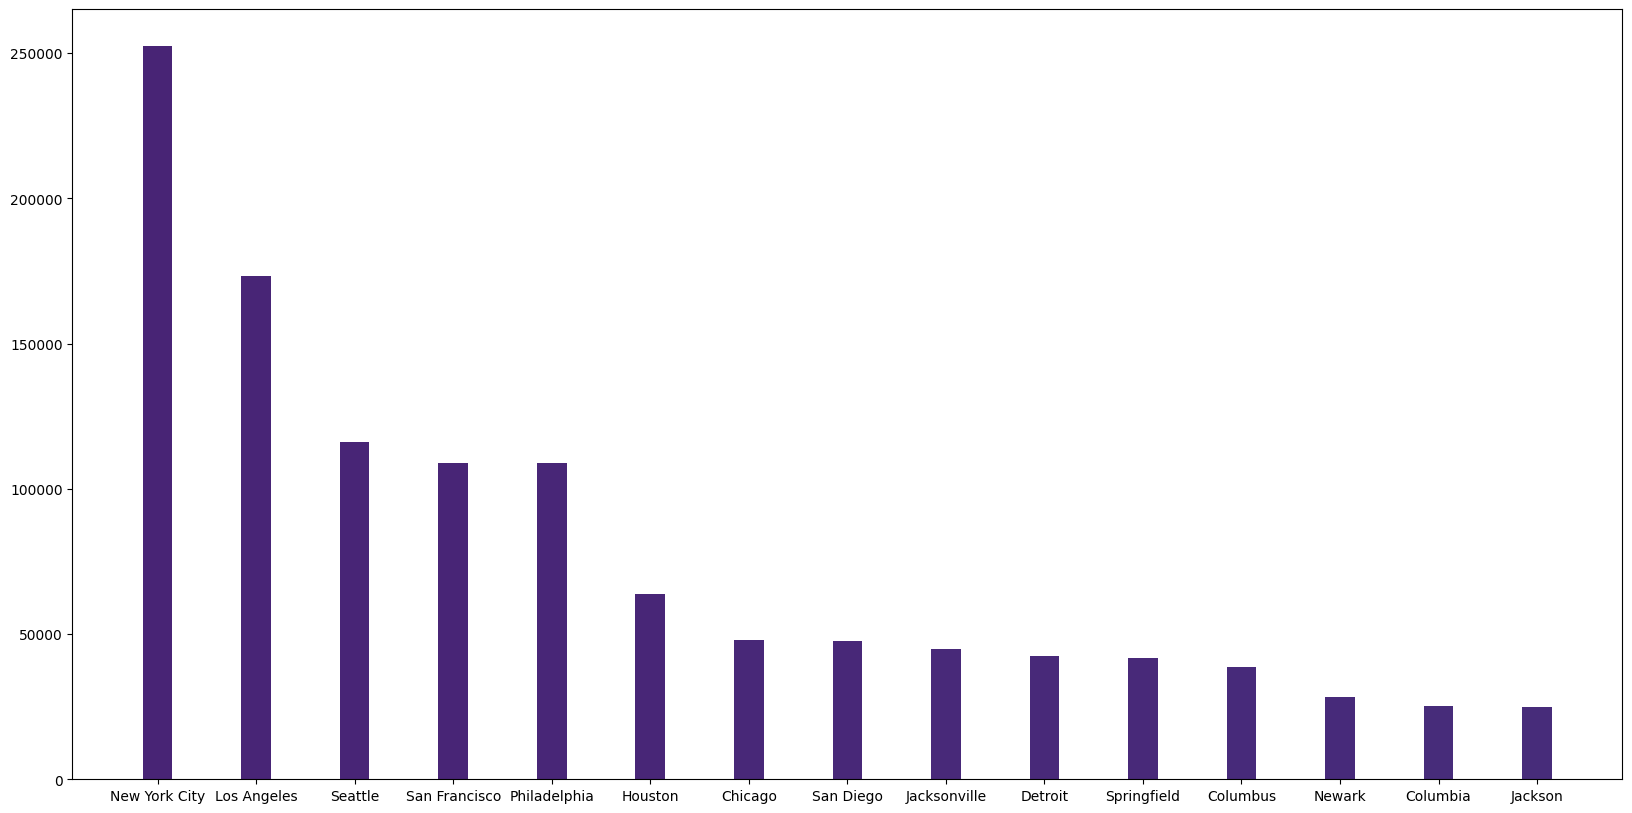

In [60]:
# Top 15 Cities from where maximum sales is generated
plt.figure(figsize=(20,10))
sales_via_city=df.groupby(by=['City'])['Sales'].sum().sort_values(ascending=False)
cmap=plt.get_cmap()
colors=cmap(np.linspace(0.1,1.0,len(sales_via_city)))
plt.bar(x=sales_via_city.index[:15],height=sales_via_city.values[:15],color=colors,width=0.3)
plt.show()

In [61]:
# Total Number of Unique Countries
print('Total Number of Unique Countries-->',len(df['Country'].unique()))

Total Number of Unique Countries--> 1


* The sales data is only of **United States**.

In [63]:
# Total number of different segments
print('Total Number of different segments-->',len(df['Segment'].unique()))

Total Number of different segments--> 3


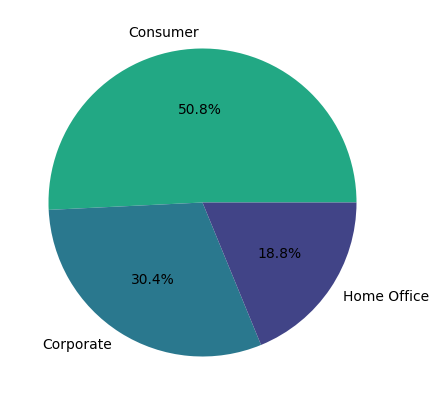

In [72]:
# Sales distribution via Segment
plt.figure(figsize=(5,5))
cmap=plt.get_cmap(name='viridis_r')
sales_via_segment=df.groupby(by=['Segment'])['Sales'].sum()
colors=cmap(np.linspace(0.4,0.8,len(sales_via_segment)))
plt.pie(x=sales_via_segment.values,labels=sales_via_segment.index,autopct='%1.1f%%',colors=colors)
plt.show()

In [73]:
# Available years in the data
df['Order_Year'].unique()

array([2017, 2016, 2015, 2018], dtype=int64)

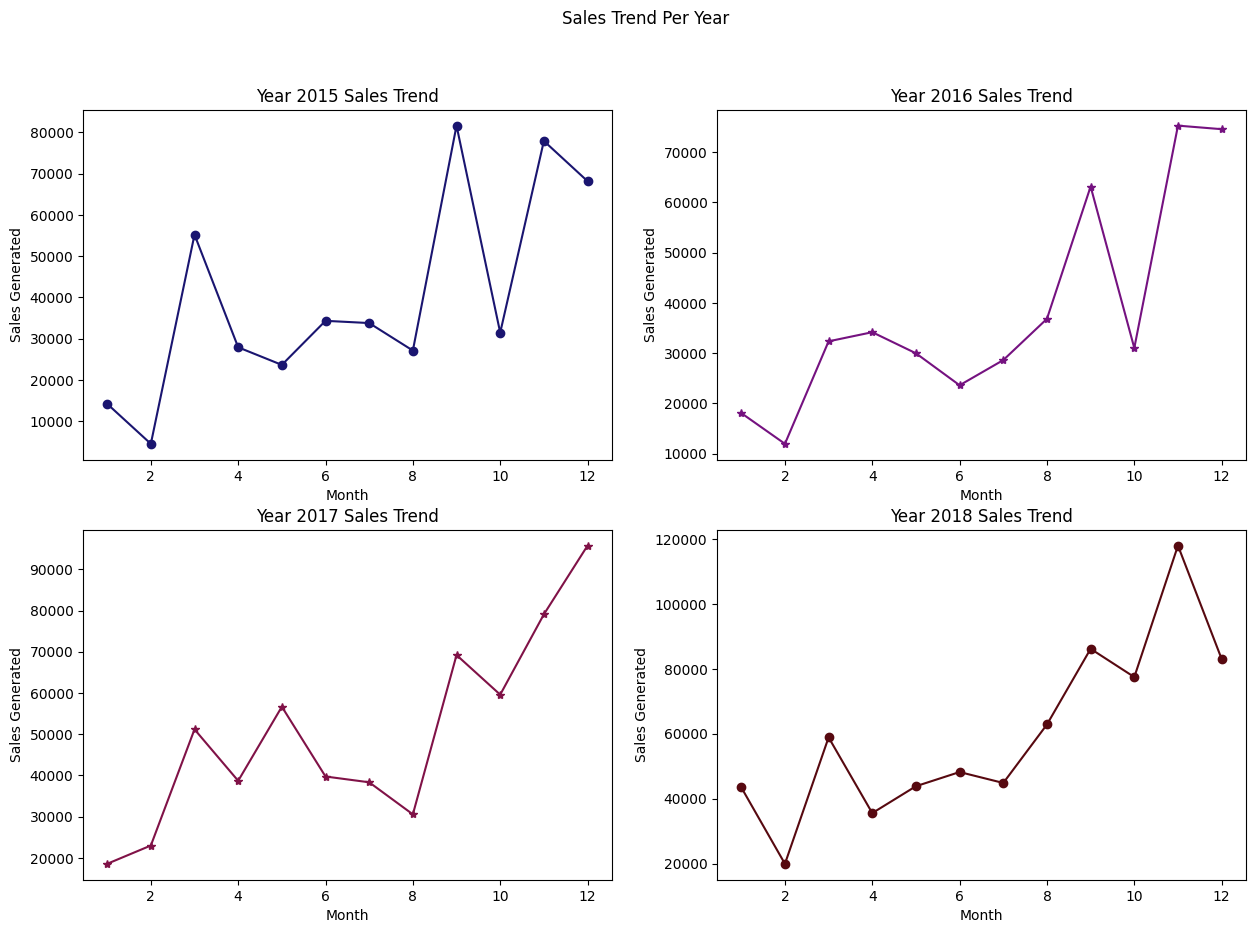

In [79]:
# Sales Trend in each year
# 2015 year dataset
df_2015=df.loc[df['Order_Year']==2015]
# 2016 year dataset
df_2016=df.loc[df['Order_Year']==2016]
# 2017 year dataset
df_2017=df.loc[df['Order_Year']==2017]
# 2018 year dataset
df_2018=df.loc[df['Order_Year']==2018]

fig,axs=plt.subplots(2,2,figsize=(15,10))

# Sales per month in year 2015
sales_via_month_2015=df_2015.groupby(by=['Order_Month'])['Sales'].sum()
axs[0,0].plot(sales_via_month_2015.index,sales_via_month_2015.values,c='#1a1570',marker='o')
axs[0,0].set_title('Year 2015 Sales Trend')
axs[0,0].set_xlabel('Month')
axs[0,0].set_ylabel('Sales Generated')
# Sales per month in year 2016
sales_via_month_2016=df_2016.groupby(by=['Order_Month'])['Sales'].sum()
axs[0,1].plot(sales_via_month_2016.index,sales_via_month_2016.values,c='#751280',marker='*')
axs[0,1].set_title('Year 2016 Sales Trend')
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Sales Generated')
# Sales per month in year 2017
sales_via_month_2017=df_2017.groupby(by=['Order_Month'])['Sales'].sum()
axs[1,0].plot(sales_via_month_2017.index,sales_via_month_2017.values,c='#801247',marker='*')
axs[1,0].set_title('Year 2017 Sales Trend')
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Sales Generated')
# Sales per month in year 2018
sales_via_month_2018=df_2018.groupby(by=['Order_Month'])['Sales'].sum()
axs[1,1].plot(sales_via_month_2018.index,sales_via_month_2018.values,c='#570910',marker='o')
axs[1,1].set_title('Year 2018 Sales Trend')
axs[1,1].set_xlabel('Month')
axs[1,1].set_ylabel('Sales Generated')

plt.suptitle('Sales Trend Per Year')
plt.show()

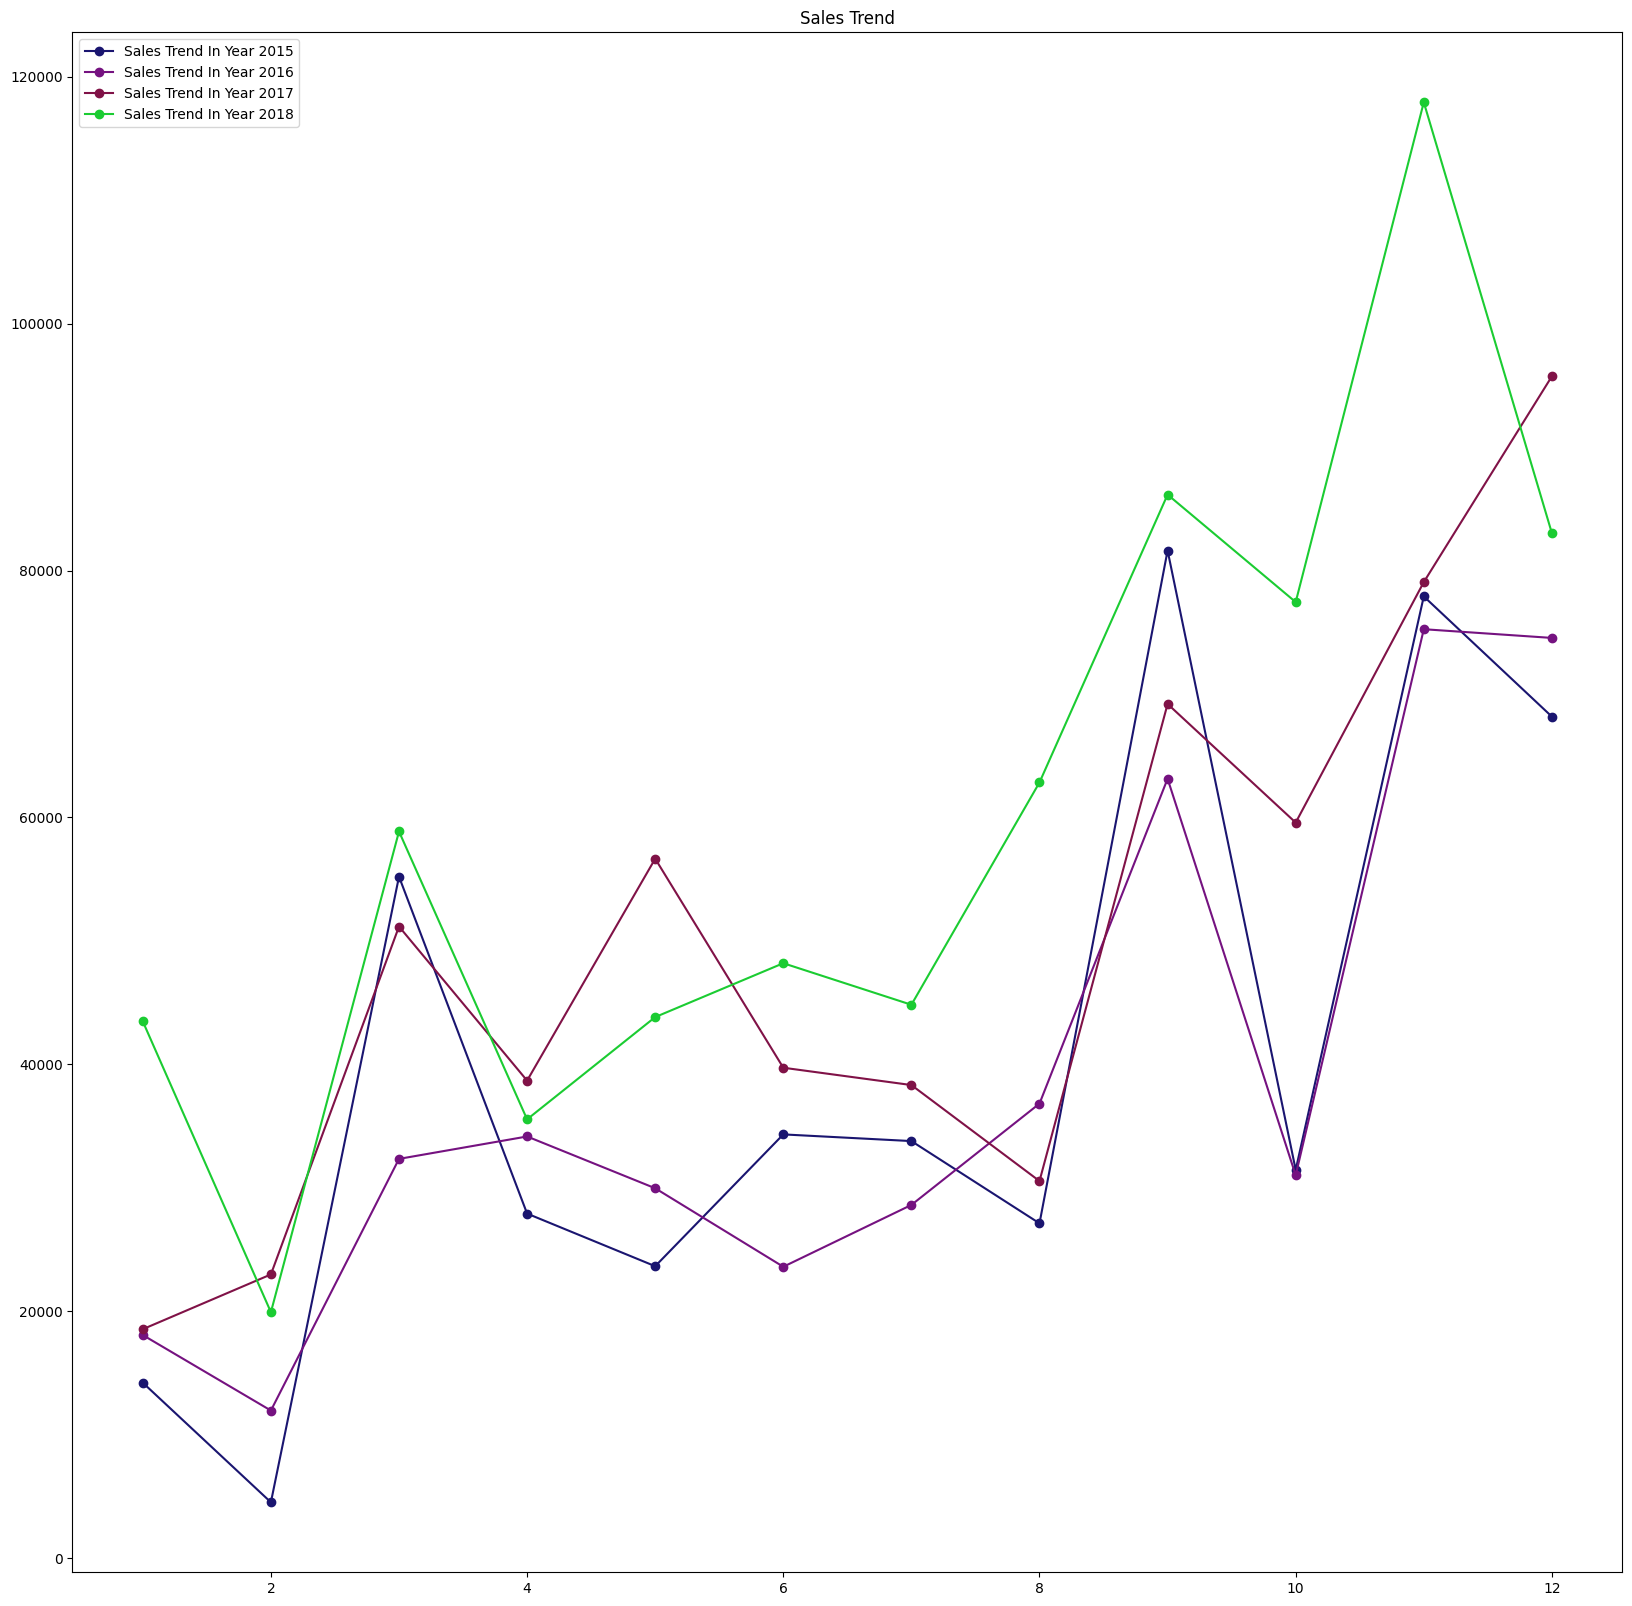

In [81]:
# Lets draw the plot on same plot to make comparisons
plt.figure(figsize=(20,20))
plt.plot(sales_via_month_2015.index,sales_via_month_2015.values,c='#1a1570',marker='o',label='Sales Trend In Year 2015')
plt.plot(sales_via_month_2016.index,sales_via_month_2016.values,c='#751280',marker='o',label='Sales Trend In Year 2016')
plt.plot(sales_via_month_2017.index,sales_via_month_2017.values,c='#801247',marker='o',label='Sales Trend In Year 2017')
plt.plot(sales_via_month_2018.index,sales_via_month_2018.values,c='#1bcc32',marker='o',label='Sales Trend In Year 2018')
plt.legend()
plt.title('Sales Trend')
plt.show()

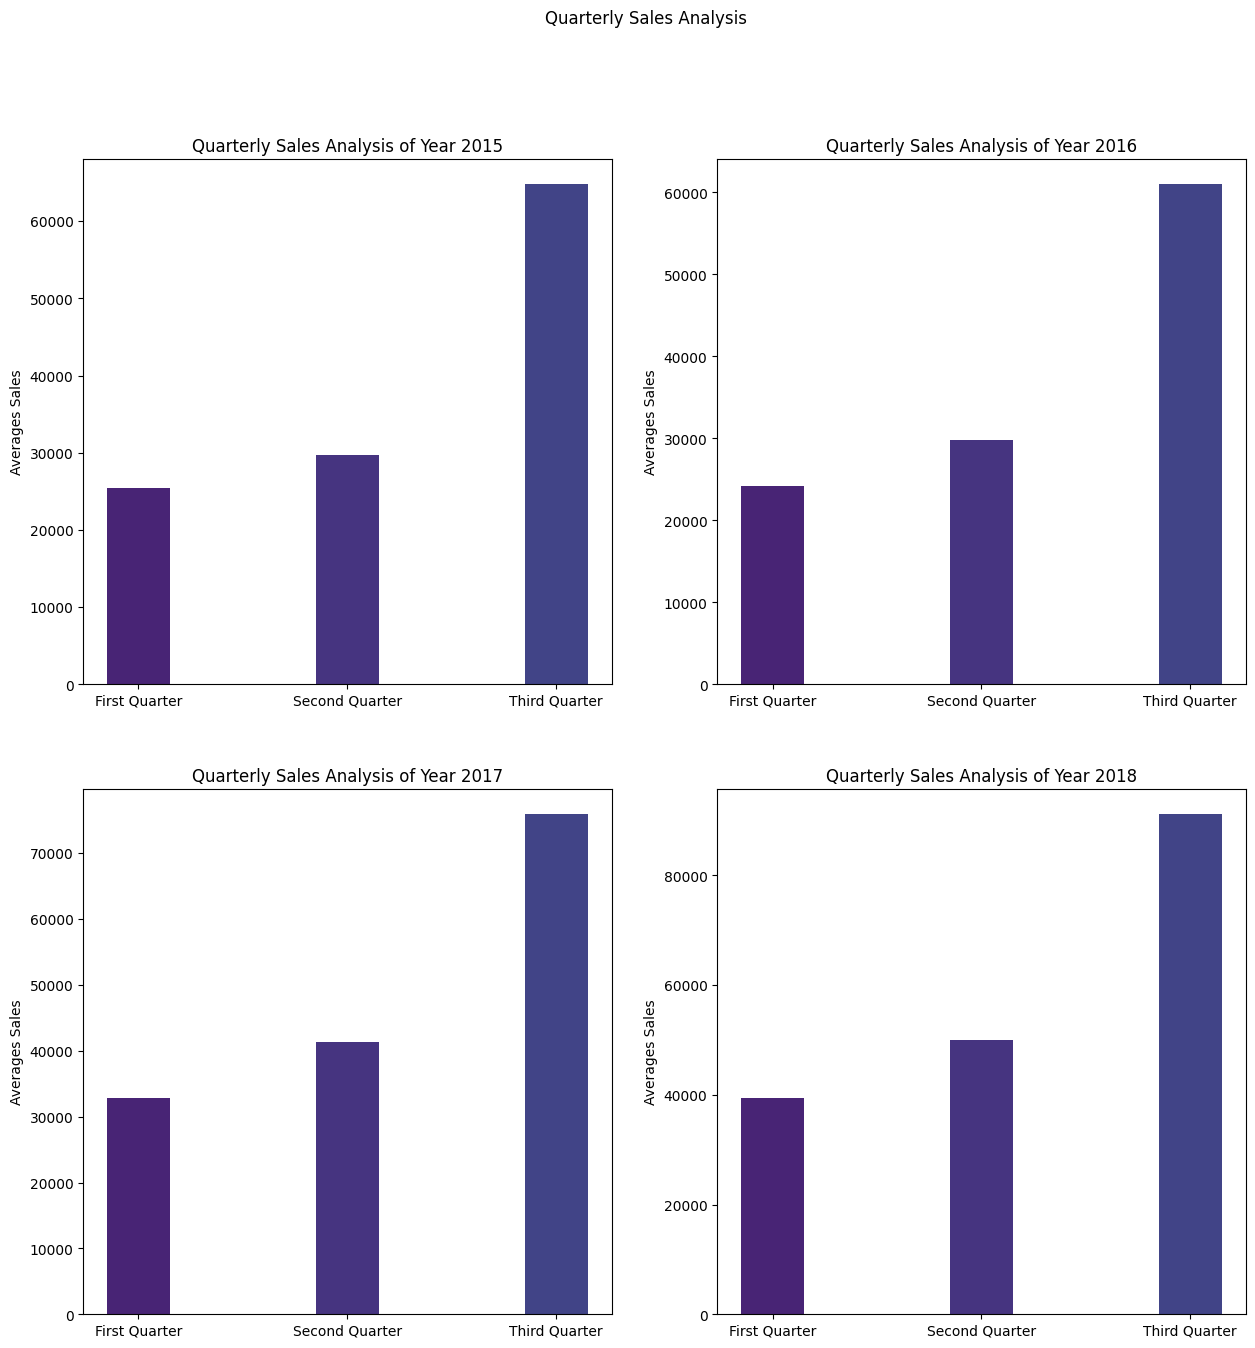

In [105]:
quarterly_2015=[]
for i in range(0,len(sales_via_month_2015.values),4):
    quarterly_2015.append(sum(sales_via_month_2015.values[i:i+4])/4)
quarterly_2016=[]
for i in range(0,len(sales_via_month_2016.values),4):
    quarterly_2016.append(sum(sales_via_month_2016.values[i:i+4])/4)
quarterly_2017=[]
for i in range(0,len(sales_via_month_2017.values),4):
    quarterly_2017.append(sum(sales_via_month_2017.values[i:i+4])/4)
quarterly_2018=[]
for i in range(0,len(sales_via_month_2018.values),4):
    quarterly_2018.append(sum(sales_via_month_2018.values[i:i+4])/4)

fig,axs=plt.subplots(2,2,figsize=(15,15))
quarter=['First Quarter','Second Quarter','Third Quarter']
cmap=plt.get_cmap('viridis')
colors=cmap(np.linspace(0.1,0.2,3))
axs[0,0].bar(quarter,quarterly_2015,color=colors,width=0.3)
axs[0,0].set_ylabel('Averages Sales')
axs[0,0].set_title('Quarterly Sales Analysis of Year 2015')

axs[0,1].bar(quarter,quarterly_2016,color=colors,width=0.3)
axs[0,1].set_ylabel('Averages Sales')
axs[0,1].set_title('Quarterly Sales Analysis of Year 2016')

axs[1,0].bar(quarter,quarterly_2017,color=colors,width=0.3)
axs[1,0].set_ylabel('Averages Sales')
axs[1,0].set_title('Quarterly Sales Analysis of Year 2017')

axs[1,1].bar(quarter,quarterly_2018,color=colors,width=0.3)
axs[1,1].set_ylabel('Averages Sales')
axs[1,1].set_title('Quarterly Sales Analysis of Year 2018')

plt.suptitle('Quarterly Sales Analysis')
plt.show()

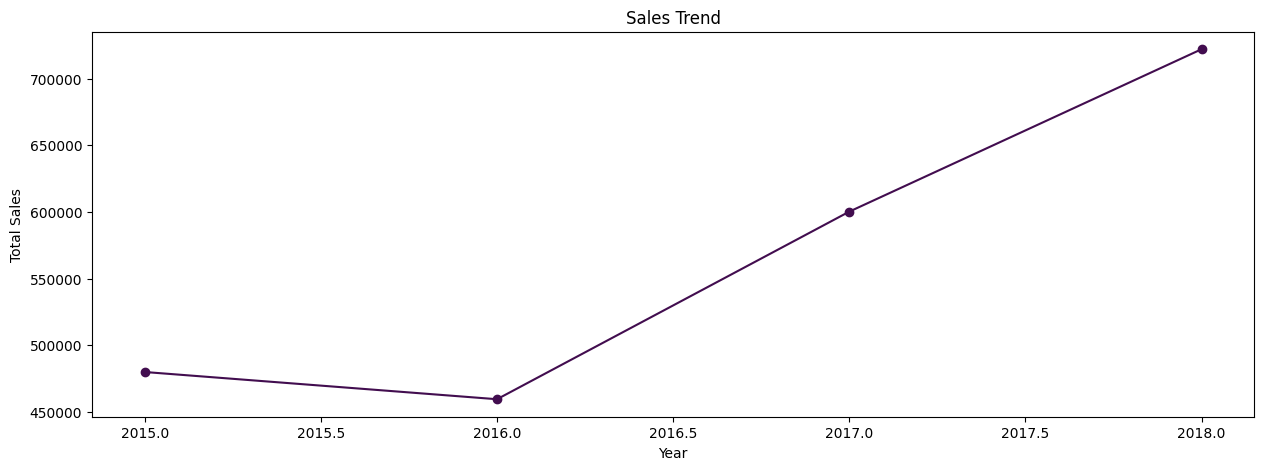

In [85]:
# Let's see the year wise trend
sales_via_year=df.groupby(by=['Order_Year'])['Sales'].sum()
plt.figure(figsize=(15,5))
plt.plot(sales_via_year.index,sales_via_year.values,c='#420d4f',marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend')
plt.show()

In [90]:
df.groupby(by=['Category','Order_Year'])['Sales'].sum()

Category         Order_Year
Furniture        2015          156477.8811
                 2016          164053.8674
                 2017          195813.0400
                 2018          212313.7872
Office Supplies  2015          149512.8200
                 2016          133124.4070
                 2017          182417.5660
                 2018          240367.5410
Technology       2015          173865.5070
                 2016          162257.7310
                 2017          221961.9440
                 2018          269370.6910
Name: Sales, dtype: float64

<Figure size 2000x2000 with 0 Axes>

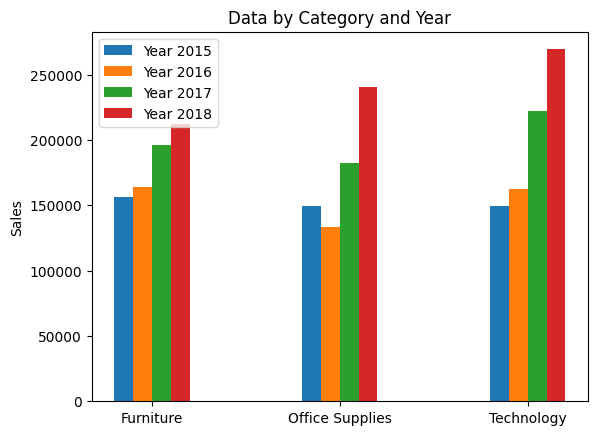

In [98]:
categories = ['Furniture', 'Office Supplies', 'Technology']
year2015_data = [156477.8811,149512.8200,149512.8200]
year2016_data = [164053.8674,133124.4070,162257.7310]
year2017_data = [195813.0400,182417.5660,221961.9440]
year2018_data = [212313.7872,240367.5410,269370.6910]

# Calculate the positions of the bars
bar_width = 0.1
x_positions = np.arange(len(categories))

plt.figure(figsize=(20,20))
# Create the figure and axes objects
fig, ax = plt.subplots()

# Draw the bars for each year
ax.bar(x_positions - bar_width*1.5, year2015_data, width=bar_width, label='Year 2015')
ax.bar(x_positions - bar_width/2, year2016_data, width=bar_width, label='Year 2016')
ax.bar(x_positions + bar_width/2, year2017_data, width=bar_width, label='Year 2017')
ax.bar(x_positions + bar_width*1.5, year2018_data, width=bar_width, label='Year 2018')
# Set the x-axis labels and ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(categories)

# Set the y-axis label and limits
ax.set_ylabel('Sales')

# Set the chart title and legend
ax.set_title('Data by Category and Year')
ax.legend()

# Display the chart
plt.show()

# Sales Insight
* **31.4%** of the sales in coming from the **West** Region.
* Maximum sales is coming from the **California** state with a value of **446306.4635**.
* Maximum sales is coming from the **NewYork** City with a value of **252462.547**.
* Sales in **Consumer** Segment is **50.8%**.
* Sales of each **category**(Furniture,Office Supplies,Technology) increases as per year.
* From year **2015** to **2016** the sales **decreases**. After that from year **2016** to **2018** the sales constantly
  **increases**.
* **Average sales** increases quarterly for each year.